
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Thursday, November 9th, submitted via Canvas by 11:59 pm</p>
### <p style="text-align: center;">Jayaj Poudel and Kevin Yee</p>
### <p style="text-align: center;">Jp49672 and kjy252</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bayesian Classifiers (15 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Bayesian classifiers (LDA, QDA and Naive Bayes) The code below loads the dataset and all necessary sklearn modules. Look up any module on the scikit-learn website for a full description.

1. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the class being digits 8 or digits 9 for every row. 
2. Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line) 
3. Report the area under the ROC curve (AUC) for each model. (5 pts for each model. Total of 15 pts)

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [3]:
idx = (y_train == 8) + (y_train==9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-8)

idx = (y_test == 8) + (y_test==9)
X_test = X_test[idx]
y_test = y_test[idx]

# Binary Classification
# Where 0 means 8 and 1 means 9
y_test = (y_test-8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11800L, 784L), (11800L,), (1983L, 784L), (1983L,))


## Solutions

## 1.1 Probability of 8 or 9 using LDA, QDA, and Naive Bayes

In [19]:
# Train LDA model 
lda = LDA()
lda.fit(X_train, y_train)
lda_preds = lda.predict_proba(X_test)
print("\nLDA Prediction")
print("Average Probability of being 8: %0.3f percent"%(lda_preds[:,0].mean()*100))
print("Average Probability of being 9: %0.3f percent"%(lda_preds[:,1].mean()*100))

# Train QDA model
qda = QDA()
qda.fit(X_train, y_train)
qda_preds = qda.predict_proba(X_test)
print("\nQDA Prediction")
print("Average Probability of being 8: %0.3f percent"%(qda_preds[:,0].mean()*100))
print("Average Probability of being 9: %0.3f percent"%(qda_preds[:,1].mean()*100))

# Train Naive Bayes model
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_preds = NB.predict_proba(X_test)
print("\nNaive Bayes Prediction")
print("Average Probability of being 8: %0.3f percent"%(NB_preds[:,0].mean()*100))
print("Average Probability of being 9: %0.3f percent"%(NB_preds[:,1].mean()*100))


LDA Prediction
Average Probability of being 8: 48.734 percent
Average Probability of being 9: 51.266 percent

QDA Prediction
Average Probability of being 8: 45.182 percent
Average Probability of being 9: 54.818 percent

Naive Bayes Prediction
Average Probability of being 8: 39.448 percent
Average Probability of being 9: 60.552 percent


## 1.2 ROC Curves

In [45]:
LDA_fpr, LDA_tpr, LDA_thresholds = roc_curve(y_test, lda_preds[:,1])
QDA_fpr, QDA_tpr, QDA_thresholds = roc_curve(y_test, qda_preds[:,1])
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, NB_preds[:,1])

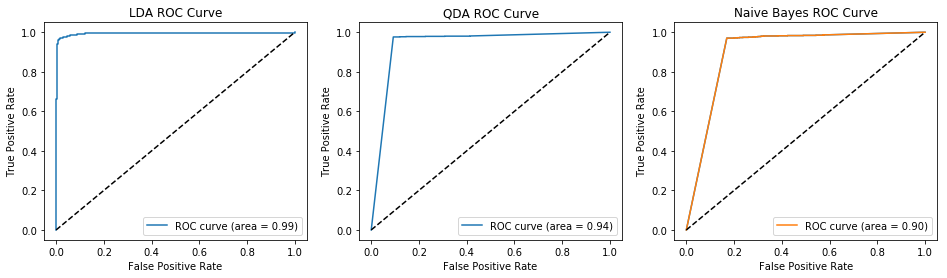

In [57]:
plt.figure(figsize=(16,4))


plt.subplot(131)
plt.plot(LDA_fpr, LDA_tpr, label = 'ROC curve (area = {0:0.2f})'
               ''.format(auc(LDA_fpr,LDA_tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('LDA ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(132)
plt.plot(QDA_fpr, QDA_tpr,label = 'ROC curve (area = {0:0.2f})'
               ''.format(auc(QDA_fpr,QDA_tpr)))

plt.plot([0, 1], [0, 1], 'k--')
plt.title('QDA ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(133)
plt.plot(NB_fpr, NB_tpr)
plt.plot(NB_fpr, NB_tpr,label = 'ROC curve (area = {0:0.2f})'
               ''.format(auc(NB_fpr,NB_tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Naive Bayes ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

## 1.3 AUC Score

In [60]:
print("AUC Scores")
print("LDA: %0.3f"%(auc(LDA_fpr,LDA_tpr)))
print("QDA: %0.3f"%(auc(QDA_fpr,QDA_tpr)))
print("Naive Bayes: %0.3f"%(auc(NB_fpr,NB_tpr)))

AUC Scores
LDA: 0.994
QDA: 0.940
Naive Bayes: 0.902


# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

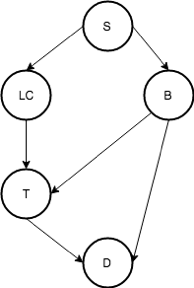

In [7]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

## Compute the following probabilities:

### (a) (2 pts) $Pr(D = yes)$

Using Law of Total Probability, we have that: 

$$Pr(D = yes) = \sum_{i=1}^nPr(D = yes | A_i)P(A_i) $$ where $A_i$ is the partitions in the sample space.

We thus have 

$$Pr(D = yes) = $$
$$Pr(D = yes | T = yes, B = yes) * P(T = yes, B = yes)$$ 
$$ + Pr(D = yes | T = yes, B = no) * P(T = yes, B = no) $$
$$ + Pr(D = yes | T = no, B = yes)*Pr(T = no, B = yes)$$ 
$$ + Pr(D = yes | T = no, B = no) * P(T = no, B = no)$$


Notice we have to solve for $P(T , B)$

This can be given by decomposing the joint probability to the following:

$$P(T,B) = P(B|T) *  P(T) = P(T|B) * P(B)$$

First let's compute $P(B)$

$$ P(B) = P(B = yes | S = yes) * P( S = yes) + P(B = yes | S = no)*P(S = no) $$

$$\therefore P(B) = 0.06 * 0.1 + 0.02  * 0.9 = 0.024 $$

Now, let's compute $P(T|B)$

$$P(T = yes, B = yes) = P(T = yes | LC = yes, B = yes)*P(B=yes) + P(T = yes | LC = no, B = yes) * P(B=no) $$

This gives us the following:
$$P(T = yes, B = yes) = (0.8 + 0.1) * 0.024 = 0.0216 $$
$$P(T = yes, B = no) = (0.5 + 0.04) * 0.976 = 0.527$$
$$P(T = no, B = yes) = (0.1) * 0.024 = 0.0024 $$
$$P(T = no, B = no) = (0.46) * 0.976 = 0.449$$

We can finally plug in and evaluate the following:

$$Pr(D = yes) = $$
$$0.9 * 0.0216$$ 
$$ + 0.7 * 0.527 $$
$$ + 0.65*0.0024$$ 
$$ + 0.015 * 0.449$$

$$\Rightarrow P(D = yes) = 0.397$$

### (b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

Intersection via Conditioning:

$$P(LC, B, D) = P(LC)* P(B|LC)*P(D|LC,B)$$

$$P(LC, B, D) = P(LC,B) * P(D|LC, B) $$


###(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).



### (d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

## Solutions

# Question 3 - Logistic Regression Classification (15pts)

Using the MNIST dataset in Q1, the goal is to build a Logistic Regression classifier to classify between digits $\textbf{8 and 9}$.  Note that the imported MNIST dataset has 10 labels, from digits 0 to 9.  Use the code below to access the data set and extract the MNIST data.

In [36]:
# Use code from Q1 to import the data

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, make_scorer, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns

C:\Users\Kevin\Anaconda\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


1. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "y = 0" class, the "y = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.  (4pts)
2. Repeat step 1 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. You will want to use 3-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).  (4pts)
3. Repeat question 2 except use l1 instead of l2 as the penalty type, use Cs of  [0.01, ..., 100].  Compare the performances of the models (no regularization, l2, l1) using the average per-class accuracy.  (3pts)
4. Using the optimal regularization parameter obtained in step 2, train a logistic regression classifier with ridge penalty to clasify $\textbf{all 10 digits}$ (digits 0,1,2,3,...9) of the MNIST dataset.  Use 'newton-cg' and 'multinomial' options for solver and multi_class parameters, respectively. Report the average per-class accuracy and confusion matrix (10 X 10) on the test data. (4pts)

## Solutions

## 3.1 Logistic Regression + Confusion Matrix

In [6]:
# Logistic Regression
logit = LogisticRegression(penalty='l2', C=1e6)
logit.fit(X_train, y_train)

# Use classifier to predict test set
preds = logit.predict(X_test)

# Determine confusion matrix 
conf_matrix = confusion_matrix(y_test,preds)
print conf_matrix

[[939  35]
 [ 35 974]]


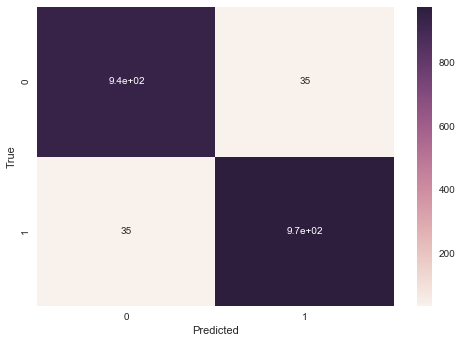

In [12]:
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

The confusion matrix tells us the following about logistic regression:
    * 939 '9' correctly predicted
    * 974 '8' correctly predicted
    * 35 '9' incorrectly predicted as '8'
    * 35 '8' incorrectly predicted as '9'

In [14]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       974
        1.0       0.97      0.97      0.97      1009

avg / total       0.96      0.96      0.96      1983



### Accuracy



Accuracy for "y = 0" class, correctly predicting 8:

$$\frac{TN}{TN + FN}$$
$$ $$
$$\frac{974}{974 + 35} = 0.965$$

Accuracy for "y = 1" class, correctly predicting 9:
$$\frac{TP}{TP + FP}$$
$ $
$$\frac{937}{937 + 35} = 0.964$$

Average per class Accuracy

$$\frac{TP + TN}{FP+FN+TP+TN} $$
$ $
$$\frac{937 + 974}{35+35+937+974} = 0.9647$$

## 3.2 Finding optimal hyperparameters in Logistic Regression

In [7]:
def per_class_avgScore(ground_truth, predictions):
    conf_mat = confusion_matrix(ground_truth, predictions);
    TN = float(conf_mat[0][0])
    FN = float(conf_mat[1][0])
    TP = float(conf_mat[1][1])
    FP = float(conf_mat[0][1])
    return (TP + TN)/(FP + FN + TP + TN)

In [8]:
# Custom scorer, default greater is better is true
score = make_scorer(per_class_avgScore)

#  params to GridCV over [0.01, 0.1, 1, 10 ,100]
params = {'C': [0.01, 0.1, 1, 10 ,100]}

# Gridsearch CV with Logistic Regression
grid_search = GridSearchCV(LogisticRegression(penalty ='l2'),params,cv=3,scoring = score)
grid_search.fit(X_train,y_train)

print grid_search.best_estimator_
print grid_search.best_score_
print grid_search.best_params_


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.982542372881
{'C': 1}


* Optimal Hyperparameter for l2 penalty: C = 1

* Best per class Average Score: 0.98254

## 3.3 Finding optimal hyperparameters in Logisitic Regression with L1 Loss

In [9]:
# Gridsearch CV with Logistic Regression
grid_search = GridSearchCV(LogisticRegression(penalty ='l1'),params,cv=3,scoring = score)
grid_search.fit(X_train,y_train)

print "Grid Search Results for l1 loss:"
print grid_search.best_estimator_
print grid_search.best_score_
print grid_search.best_params_

print ("Best per class Average score:",grid_search.best_score_)
print ("Optimal Parameter for l1 penalty:",grid_search.best_params_)

Grid Search Results for l1 loss:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.980847457627
{'C': 1}
('Best per class Average score:', 0.98084745762711867)
('Optimal Parameter for l1 penalty:', {'C': 1})


* Optimal Hyperparameter for l1 penalty: C = 1

* Best per class Average Score: 0.98084

### No Regularization vs L2 penalty vs L1 penalty

#### Results

1) **Per Class Avg of No Regularization, C = 100000**: 0.9647

2) **Per Class Avg of L2 Penalty, C = 1**: 0.98254

3) **Per Class Avg of L1 Penalty, C = 1**: 0.98084

The results above indicates that the initial model was overfitting. With very little regularization, the best per class average score was 0.9647

After putting high regularization, with C = 1, for both ridge(l2) and lasso(l1), the best per class average score were both ~0.98.

However, ridge regularization with C = 1 performed the best overall, indicating that some important coefficients in lasso may have gone to zero. A higher fold cross validation might be used to confirm this.

## 3.4 Classify all 10 digits in MNIST with Logistic Regression with Ridge Penalty

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

# Fetch original MNIST Data before modifying them to a binary classification

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

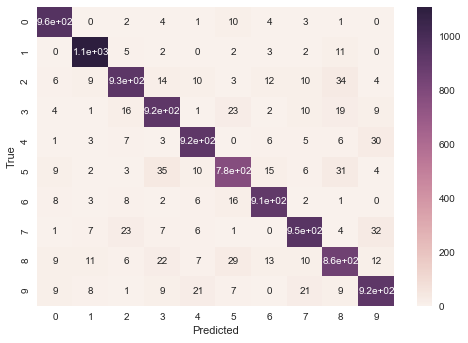

In [14]:
multi_class_logit = LogisticRegression(penalty='l2',
                                       C=1,solver ='newton-cg',
                                       multi_class='multinomial')
# Train and Fit model
multi_class_logit.fit(X_train,y_train)
preds = multi_class_logit.predict(X_test)

# Determine confusion matrix 
conf_matrix = confusion_matrix(y_test,preds)

# Print heatmap
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')


In [15]:
# Determine the score
print "Average Accuracy: ", multi_class_logit.score(X_test, y_test)

Average Accuracy:  0.9256


### Observation
As expected, the most misclassifcations occured in classifying the following:

* Misclassifying 3 for 5
* Misclassifting 8 for 2
* Misclassifying 8 for 5
* Misclassifying 9 for 7
* Misclassifying 9 for 4

# Question 4: Regression Trees (6+5+4 = 15 points)
In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. 

You will be using an NBA dataset (nbasalariesfull.csv) to predict a player’s Salary using all the numeric performance variables available ( so everything but Player, Team, and Position ). 

- a. Use a random state of 42 and a test size of 1/3 to split the data into training and test.
     
         Build a regression using DecisionTreeRegressor with max_depth = 6. 
         Report the mean squared errors on both training and test datasets.( 6 points )


- b. Repeat Part-1 with max_depth = 2. (5 points )


- c. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 6 and 2? 
         Which tree is better and why? ( 4 points )

In [16]:
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import matplotlib.pyplot as plt

In [17]:
nbasalaries = pd.read_csv('nbasalariesfull.csv')
nbasalaries.head()

,Player,Tm,Pos,Age,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PSG,SALARY
0,Stephen Curry,GSW,PG,27.0,79.0,79.0,34.2,10.2,20.2,0.504,...,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,11370786
1,James Harden,HOU,SG,26.0,82.0,82.0,38.1,8.7,19.7,0.439,...,0.8,5.3,6.1,7.5,1.7,0.6,4.6,2.8,29.0,15756438
2,Kevin Durant,OKC,SF,27.0,72.0,72.0,35.8,9.7,19.2,0.505,...,0.6,7.6,8.2,5.0,1.0,1.2,3.5,1.9,28.2,20158622
3,DeMarcus Cousins,SAC,C,25.0,65.0,65.0,34.6,9.2,20.5,0.451,...,2.4,9.1,11.5,3.3,1.6,1.4,3.8,3.6,26.9,15851950
4,LeBron James,CLE,SF,31.0,76.0,76.0,35.6,9.7,18.6,0.520,...,1.5,6.0,7.4,6.8,1.4,0.6,3.3,1.9,25.3,22970500


## Solutions

## Preprocessing

In [18]:
# Predict player's salary
# Exclude non numeric values.
# e.g Player, Team, and Position

X = nbasalaries.drop(['Player', 'Tm', 'Pos', 'SALARY'], axis = 1)
y = nbasalaries.SALARY
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

## 4.a) DecisionTreeRegressor, max_depth = 6

In [20]:
# Fit Decision Tree
dTree6 = DecisionTreeRegressor(max_depth = 6)
dTree6.fit(X_train,y_train)

# Report Metrics on Training Set
trainpreds = dTree6.predict(X_train)
train_mse = mean_squared_error(y_train,trainpreds)

print("MSE on Training Set", train_mse)

# Report Metrics on Testing Set 
testpreds = dTree6.predict(X_test)
test_mse = mean_squared_error(y_test,testpreds)

print("MSE on Testing Set", test_mse)

('MSE on Training Set', 3108983856351.2788)
('MSE on Testing Set', 18779196437218.406)


## 4.b) DecisionTreeRegressor, max_depth = 2

In [21]:
# Fit Decision Tree
dTree2 = DecisionTreeRegressor(max_depth = 2)
dTree2.fit(X_train,y_train)

# Report Metrics on Training Set
trainpreds = dTree2.predict(X_train)
train_mse = mean_squared_error(y_train,trainpreds)

print("MSE on Training Set", train_mse)

# Report Metrics on Testing Set 
testpreds = dTree2.predict(X_test)
test_mse = mean_squared_error(y_test,testpreds)

print("MSE on Testing Set", test_mse)

('MSE on Training Set', 12138163555466.166)
('MSE on Testing Set', 16855575167270.082)


## 4.c) Comparison on Trees with differing depths

Overall, the tree with max_depth = 2 performed better than max_depth = 6.

With max_depth = 6, the tree is overfitting and has higher variance.

We can see this in the MSE scores for the training set:

$$MSE~of~Depth~6~Training < MSE~of~Depth~2~Training$$

The MSE of the training set of a deeper tree was significantly better than that of the test set.

However,

$$MSE~of~Depth~6~Test > MSE~of~Depth~2~Test$$

This shows, the tree with max_depth 2 performs better because of it's ability to generalize to the data and not overfit

# Question 5.  AUC vs Lift Curve ( 5 points )
Describe the similarities and differences between AUC and Lift Curves.

## Solution

Source:  http://chem-eng.utoronto.ca/~datamining/dmc/model_evaluation_c.htm

Similarities

1. AUC and Lift Curves are both model evaluation for classification problems
2. Both help visualize performance of model in comparison to a random guess.

Differences

1. Lift/Gain Chart measures the effectiveness of a model using the **ratio** between the results obtained with and without the model.
In contrast to the confusion matrix that evaluates models on the whole population, the gain/lift chart evaluates model performance in a portion for the population.

For instance of Gain Chart:
![](http://i.markdownnotes.com/image_8dhy7Oa.png)

We determine how much better the model performs better than a random guess.

A Lift Chart measures how much better our model is at a particular ratio in comparison the a random guess:
![](http://i.markdownnotes.com/image_QaH4dJe.png)

Example here demonstrates how much **better** the model performs.


2. AUC Charts on the other hand measures how well a model is performing. This is an absolute score in comparison to the Lift Chart.
The ROC chart shows false potive rates on X-axis and true positive rate on Y-Axis.
Area under ROC curve is often used a measure of quality of the classification model. A random classifier has an area under the curve of 0.5, while AUC has a perfect classifier is equal to 1.
Example:

![](http://i.markdownnotes.com/image_ZNui0ah.png)